In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

dataframe = pd.read_csv(
    "https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Pokemon.csv",
)

In [3]:
dataframe.head()

,SN,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       414 non-null    object
 4   HP           800 non-null    int64 
 5   Attack       800 non-null    int64 
 6   Defense      800 non-null    int64 
 7   Sp. Attack   800 non-null    int64 
 8   Sp. Defense  800 non-null    int64 
 9   Speed        800 non-null    int64 
 10  Generation   800 non-null    int64 
 11  Legendary    800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


### **Задача.** Выберите две количественные переменные и найдите для них 95% доверительные интервалы средних значений. Дайте интерпретацию результат

In [5]:
import numpy as np
from scipy import stats


def compute_interval(series: pd.Series, percent: float = 0.95) -> tuple[np.float64, np.float64]:
    """Расчет доверительного интервала для колонки pandas."""
    mu = series.mean()
    std = series.std(ddof=1)
    n = series.shape[0]

    return stats.norm.interval(confidence=percent, loc=mu, scale=std / np.sqrt(n))

In [6]:
compute_interval(dataframe["HP"])

(np.float64(67.48932022672939), np.float64(71.02817977327062))

Доверительный 95% интервал для среднего значения здоровья находится ~ от 67.49 до 71.03. Т. е среднее значение генеральной совокупности находится в этом интервале с вероятностью 95%.

In [7]:
compute_interval(dataframe["Attack"])

(np.float64(76.75211062565727), np.float64(81.25038937434273))

Доверительный 95% интервал для среднего значения атаки находится ~ от 76.75 до 81.25. Т. е среднее значение генеральной совокупности находится в этом интервале с вероятностью 95%.

### **Задача.** Оцените распределение этих переменных на нормальность с помощью формальных тестов. Сделайте вывод

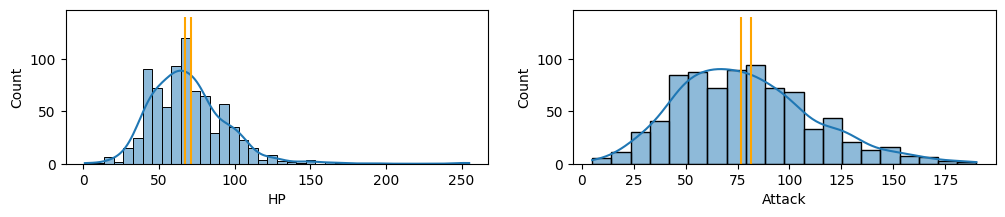

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 2))
sns.histplot(dataframe, x="HP", ax=axes[0], kde=True)
axes[0].vlines(compute_interval(dataframe["HP"]), ymin=0, ymax=140, color="orange")
sns.histplot(dataframe, x="Attack", ax=axes[1], kde=True)
axes[1].vlines(compute_interval(dataframe["Attack"]), ymin=0, ymax=140, color="orange")
plt.show()

In [9]:
def is_normal_distribution_3_test(series: pd.Series) -> None:
    """Проверяет на нормальное распределение.

    Выводит метрики по 3 тестам: Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov.
    """
    print("=" * 10 + " Shapiro-Wilk test " + "=" * 10)
    stat, p_value = stats.shapiro(series)
    print(f"Статистика = {stat:.4f}, p-value = {p_value:.4f}")
    print()

    print("=" * 10 + " Anderson-Darling test " + "=" * 10)
    anderson_test_res = stats.anderson(series, dist="norm")
    crit_value = anderson_test_res.critical_values[anderson_test_res.significance_level == 5][0]

    decision = "H0 не отвергаем, переменная имеет нормальное распределение"
    if anderson_test_res.statistic > crit_value:
        decision = "H0 отвергаем, переменная имеет ненормальное распределение"

    print(f"Тестовая статистика: {anderson_test_res.statistic: .4f}")
    print(f"Критическое значение статистики: {crit_value: .4f}")
    print(f"Решение: {decision}")
    print()

    print("=" * 10 + " Kolmogorov-Smirnov test " + "=" * 10)
    stat, p_value = stats.kstest(series, "norm", args=(series.mean(), series.std(ddof=1)))
    print(f"Статистика = {stat:.4f}, p-value = {p_value:.4f}")


In [10]:
is_normal_distribution_3_test(dataframe["HP"])

========== Shapiro-Wilk test ==========
Статистика = 0.9158, p-value = 0.0000

========== Anderson-Darling test ==========
Тестовая статистика:  8.4488
Критическое значение статистики:  0.7830
Решение: H0 отвергаем, переменная имеет ненормальное распределение

========== Kolmogorov-Smirnov test ==========
Статистика = 0.0958, p-value = 0.0000


In [11]:
is_normal_distribution_3_test(dataframe["Attack"])

========== Shapiro-Wilk test ==========
Статистика = 0.9789, p-value = 0.0000

========== Anderson-Darling test ==========
Тестовая статистика:  4.4102
Критическое значение статистики:  0.7830
Решение: H0 отвергаем, переменная имеет ненормальное распределение

========== Kolmogorov-Smirnov test ==========
Статистика = 0.0642, p-value = 0.0026


Распределения значений здоровья и атаки, без сомнений, отличается от нормальной.

### **Задача.** Возьмите две группы наблюдений (разбейте по какой-либо бинарной переменной) и протестируйте гипотезу о равенстве математических ожиданий с помощью двухвыборочного t-теста и с помощью теста Манна-Уитни

Предположим что у легендарных покемонов в среднем HP меньше или равна обычным - это будет нулевая гипотеза.

In [12]:
legendary_hp = dataframe[dataframe["Legendary"]]["HP"]
default_hp = dataframe[~dataframe["Legendary"]]["HP"]

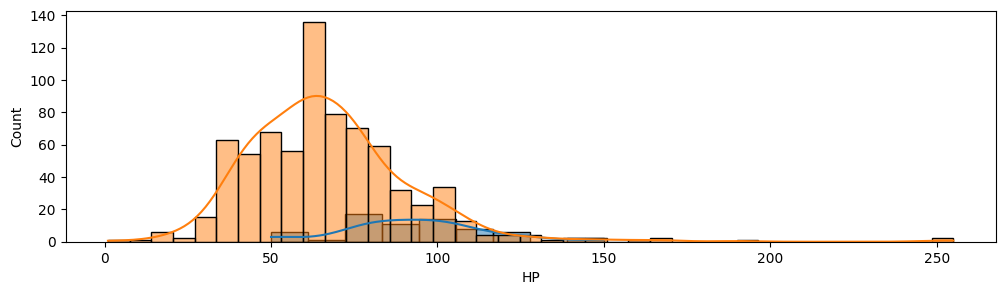

In [13]:
plt.figure(figsize=(12, 3))
sns.histplot(x=legendary_hp, kde=True)
sns.histplot(x=default_hp, kde=True)
plt.show()

In [14]:
test_result = stats.ttest_ind_from_stats(
    mean1=legendary_hp.mean(),
    std1=legendary_hp.std(ddof=1),
    nobs1=legendary_hp.shape[0],
    mean2=default_hp.mean(),
    std2=default_hp.std(ddof=1),
    nobs2=default_hp.shape[0],
    equal_var=False,
    alternative="greater",
)
print(f"t-статистика: {test_result.statistic:.4f}")
print(f"p-value: {test_result.pvalue:.4f}")

t-статистика: 8.9814
p-value: 0.0000


t-test показывает что средняя 1-го распределения статистически значимо выше, чем средняя 2-го распределения. 1 выборка с легендарными покемонами, а 2 с обычными. Т. е нулевую гипотезу можно отклонить. Также нужно учитывать, что данные распределены не нормально, **t-test может быть не точен**.

In [15]:
test_result = stats.mannwhitneyu(legendary_hp, default_hp, alternative="greater")
print(f"t-статистика: {test_result.statistic:.4f}")
print(f"p-value: {test_result.pvalue:.4f}")

t-статистика: 38778.0000
p-value: 0.0000


Непараметрический тест Манна-Уитни также показывает статистически значимые отличия, а значит 0 гипотезу можно отклонить.

### **Задача.** Постройте доверительный интервал для разницы в средних значениях на основе бутстрапа. Сделайте вывод.

In [16]:
def deference_in_means(sample1: pd.Series, sample2: pd.Series) -> float:
    return sample1.mean() - sample2.mean()

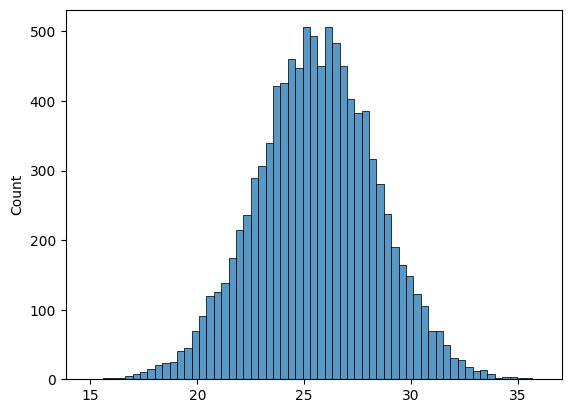

In [17]:
rng = np.random.default_rng(seed=42)
res = stats.bootstrap((legendary_hp, default_hp), deference_in_means, method="basic", rng=rng)
sns.histplot(x=res.bootstrap_distribution)
plt.show()

In [18]:
res.confidence_interval

ConfidenceInterval(low=np.float64(20.013207744636322), high=np.float64(31.121543694400838))

Поскольку 0 не попадает в доверительный интервал, есть статистически значимая разница между средними значениями HP легендарных покемонов и обычных.